<a href="https://colab.research.google.com/github/sudeep-009/Share-Price-Prediction/blob/dev/StockMarketPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Projects/Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

**Understanding Data**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
print('The number of records present in the dataset {}'.format(df.shape[0]))
print('The number of features present in the dataset {}'.format(df.shape[1]))

The number of records present in the dataset 185
The number of features present in the dataset 5


In [ ]:
print('Number of duplicate value present in the dataset is {}'.format(len(df[df.duplicated()])))

Number of duplicate value present in the dataset is 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

**Findings:**
* 185 records are present in the dataset.
* 4 features are present in the dataset.
* No null values are present in the dataset.
* No duplicate records are present in the dataset.


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Transforming date object into pandas datetime object**

In [ ]:
# transforming date object into datetime format
df['Date'] = pd.to_datetime(df['Date'],format="%b-%y")


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df = df.asfreq('D')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### **EDA**

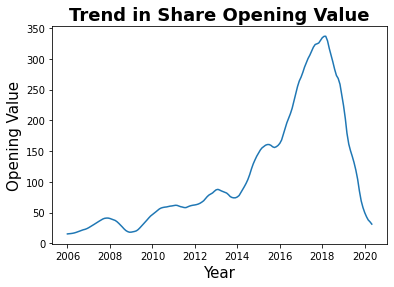

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.plot(seasonal_decompose(df.Open).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Opening Value', fontsize=15)
plt.title('Trend in Share Opening Value', weight='bold', fontsize=18)
plt.show()

**Finding:**

* Shares opening price shows increasing trend from 2006 to 2018.
* Shares opening price shows sharp decreasing trend from 2018 to 2020.

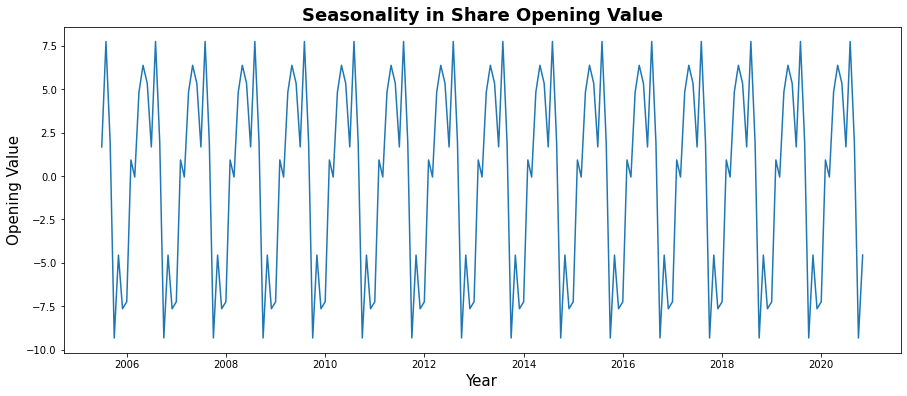

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,6))
plt.plot(seasonal_decompose(df.Open).seasonal)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Opening Value', fontsize=15)
plt.title('Seasonality in Share Opening Value', weight='bold', fontsize=18)
plt.show()

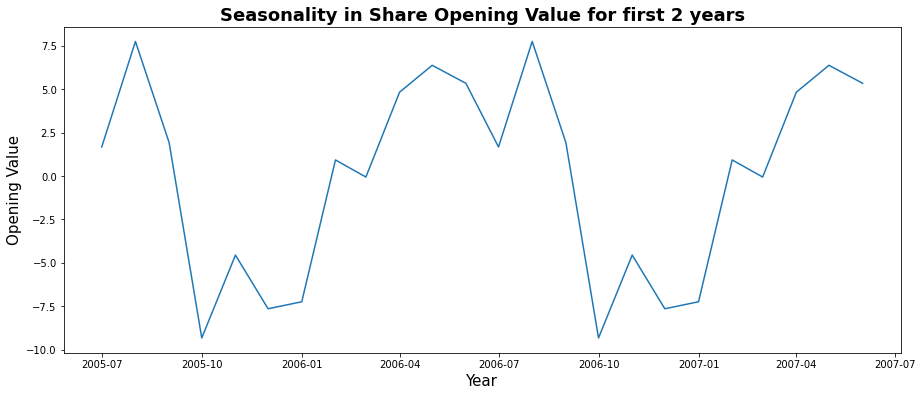

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,6))
plt.plot(seasonal_decompose(df.Open).seasonal.iloc[:24])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Opening Value', fontsize=15)
plt.title('Seasonality in Share Opening Value for first 2 years', weight='bold', fontsize=18)
plt.show()

### **Share Closing Price**

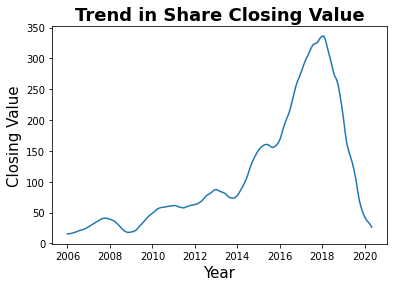

In [ ]:
plt.plot(seasonal_decompose(df.Close).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Closing Value', fontsize=15)
plt.title('Trend in Share Closing Value', weight='bold', fontsize=18)
plt.show()

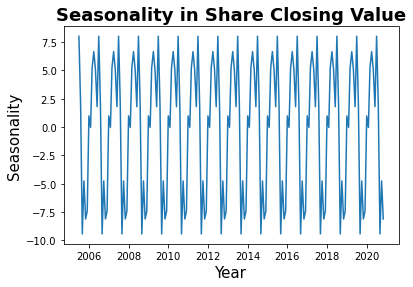

In [ ]:
plt.plot(seasonal_decompose(df.Close).seasonal)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Seasonality', fontsize=15)
plt.title('Seasonality in Share Closing Value', weight='bold', fontsize=18)
plt.show()

**Residual in Share Closing Value**

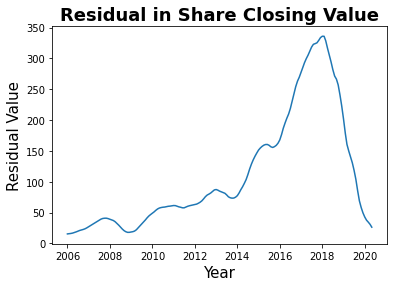

In [ ]:
plt.plot(seasonal_decompose(df.Close).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Residual Value', fontsize=15)
plt.title('Residual in Share Closing Value', weight='bold', fontsize=18)
plt.show()

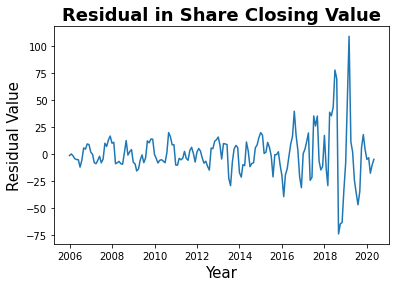

In [ ]:
plt.plot(seasonal_decompose(df.Close).resid)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Residual Value', fontsize=15)
plt.title('Residual in Share Closing Value', weight='bold', fontsize=18)
plt.show()

### **Monthly Share High Price**

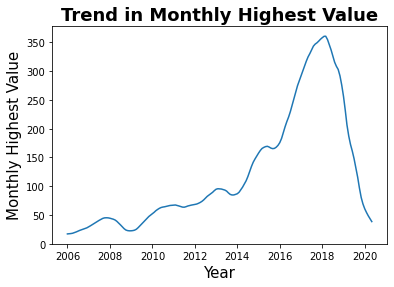

In [ ]:
plt.plot(seasonal_decompose(df.High).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Monthly Highest Value', fontsize=15)
plt.title('Trend in Monthly Highest Value', weight='bold', fontsize=18)
plt.show()

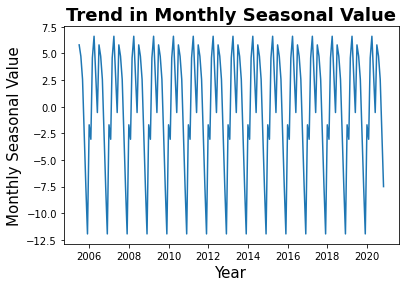

In [ ]:
plt.plot(seasonal_decompose(df.High).seasonal)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Monthly Seasonal Value', fontsize=15)
plt.title('Trend in Monthly Seasonal Value', weight='bold', fontsize=18)
plt.show()

### **Seasonal Decomposition**

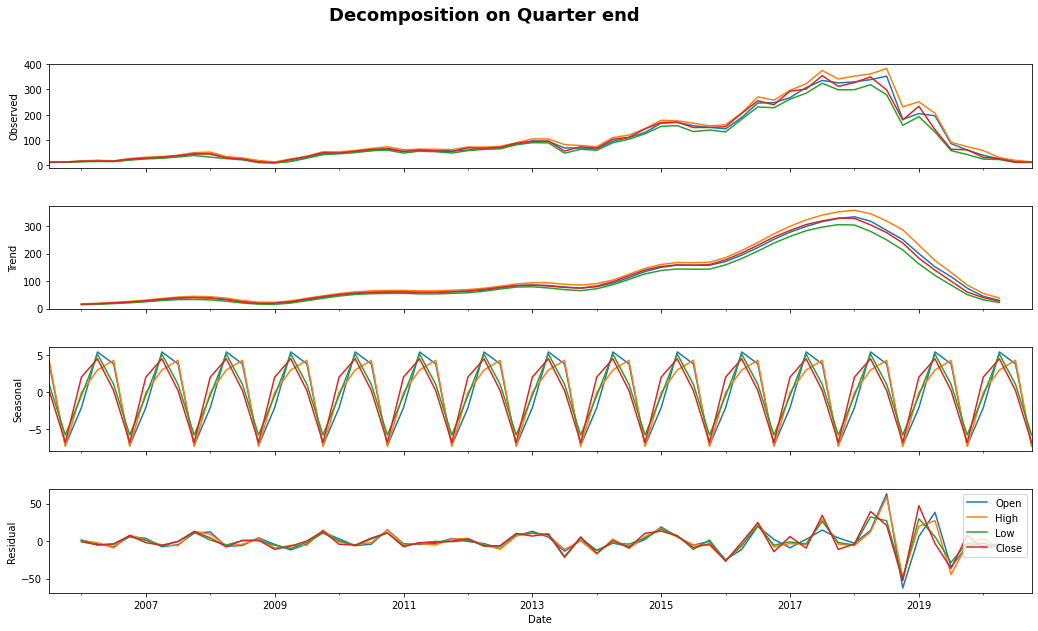

In [ ]:
quarter_end = df.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
fig = seasonal_decompose(quarter_end, model='additive').plot()
fig.set_size_inches((16,9))
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.legend()
plt.show()

In [ ]:
quarter_end = df.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
quarter_df = pd.DataFrame(quarter_end)
quarter_df.head()

,Open,High,Low,Close
Date,,,,
2005-09-30,13.020000,14.583333,12.023333,13.060000
2005-12-31,13.346667,14.263333,12.760000,13.370000
2006-03-31,15.126667,18.360000,15.000000,17.176667
2006-06-30,19.520000,20.333333,15.740000,17.713333
2006-09-30,16.633333,18.226667,15.440000,17.486667


In [ ]:
quarter_decompose_df = np.round(seasonal_decompose(quarter_df, model='additive').seasonal, 2)
decompose_df = pd.DataFrame(data=quarter_decompose_df,index=quarter_df.index)

In [ ]:
decompose_df.head()

,Open,High,Low,Close
Date,,,,
2005-09-30,3.83,4.31,1.07,0.22
2005-12-31,-7.18,-7.31,-5.77,-6.79
2006-03-31,-2.09,-0.02,-0.45,2.04
2006-06-30,5.44,3.01,5.15,4.52
2006-09-30,3.83,4.31,1.07,0.22


**Deseasonalized quarter**

In [ ]:
deseasonalized_df = quarter_df - decompose_df

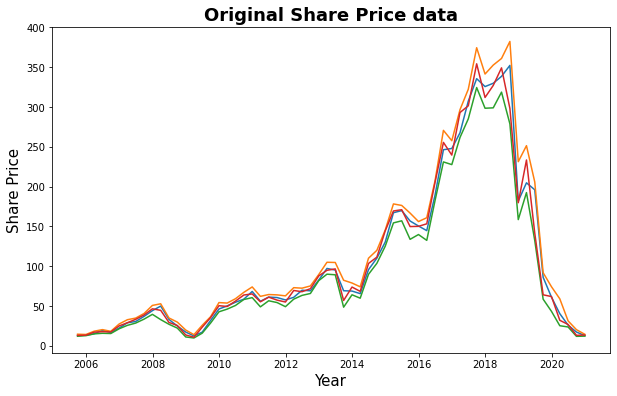

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(quarter_df)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Share Price', fontsize=15)
plt.title('Original Share Price data', weight='bold', fontsize=18)
plt.show()

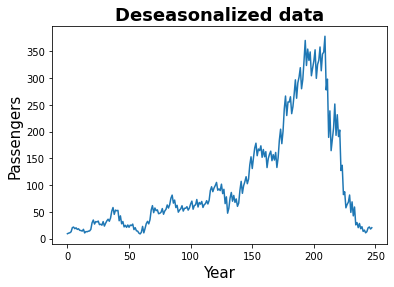

In [ ]:
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(pd.melt(deseasonalized_df.T).value)
# plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(deseasonalized_df.T).value.variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()

**Smoothing Time Series**

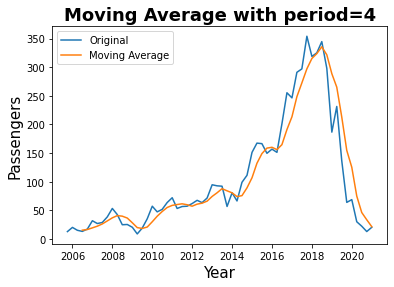

In [ ]:
plt.plot(deseasonalized_df['Close'], label='Original')
plt.plot(deseasonalized_df['Close'].rolling(4, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=4', weight='bold', fontsize=18)
plt.show()

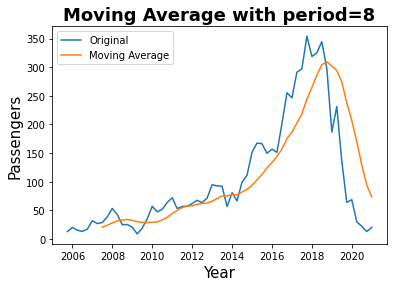

In [ ]:
plt.plot(deseasonalized_df['Close'], label='Original')
plt.plot(deseasonalized_df['Close'].rolling(8, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=8', weight='bold', fontsize=18)
plt.show()